In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sep

In [3]:

f105w = fits.getdata('UDFf105.fits')

In [6]:
f160w = fits.getdata('f160w.fits')

In [7]:
f125w = fits.getdata('f125.fits')

In [8]:
median_f160w = np.nanmedian(f160w[f160w<1])
median_f125w = np.nanmedian(f125w[f125w<1])
median_f105w = np.nanmedian(f105w[f105w<1])
print(f'Median of F160W sky {median_f160w}')
print(f'Median of F125W sky {median_f125w}')
print(f'Median of F105W sky {median_f105w}')

Median of F160W sky 0.0
Median of F125W sky 0.0
Median of F105W sky 0.0


In [9]:
f105w = f105w.byteswap().newbyteorder()
f160w = f160w.byteswap().newbyteorder()
f125w = f125w.byteswap().newbyteorder()

In [10]:
median_f160w = np.nanmedian(f160w[f160w<1])
median_f125w = np.nanmedian(f125w[f125w<1])
median_f105w = np.nanmedian(f105w[f105w<1])
print(f'Median of F160W sky {median_f160w}')
print(f'Median of F125W sky {median_f125w}')
print(f'Median of F105W sky {median_f105w}')

Median of F160W sky 0.0
Median of F125W sky 0.0
Median of F105W sky 0.0


In [11]:
bkg_f160w = sep.Background(f160w)
bkg_f125w = sep.Background(f125w)
bkg_f105w = sep.Background(f105w)
f160w -= bkg_f160w
f125w -= bkg_f125w
f105w -= bkg_f105w

In [12]:
median_f160w = np.nanmedian(f160w[f160w<1])
median_f125w = np.nanmedian(f125w[f125w<1])
median_f105w = np.nanmedian(f105w[f105w<1])
print(f'Median of F160W sky {median_f160w}')
print(f'Median of F125W sky {median_f125w}')
print(f'Median of F105W sky {median_f105w}')

Median of F160W sky 2.268324725663603e-21
Median of F125W sky 7.127440320205985e-22
Median of F105W sky 2.268324725663603e-21


In [13]:
def rescale_data(data,dmin=0.01,dmax=10.0):
    
    datac= np.clip(data,dmin,dmax)
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))

In [14]:
p_f160w = rescale_data(f160w)
p_f125w = rescale_data(f125w)
p_f105w = rescale_data(f105w)

In [17]:
rgb = np.stack([p_f125w,0.7*p_f160w,p_f105w],axis=-1)
print(rgb.shape)

(3600, 3600, 3)


[W 2024-12-09 22:49:42,573.573 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


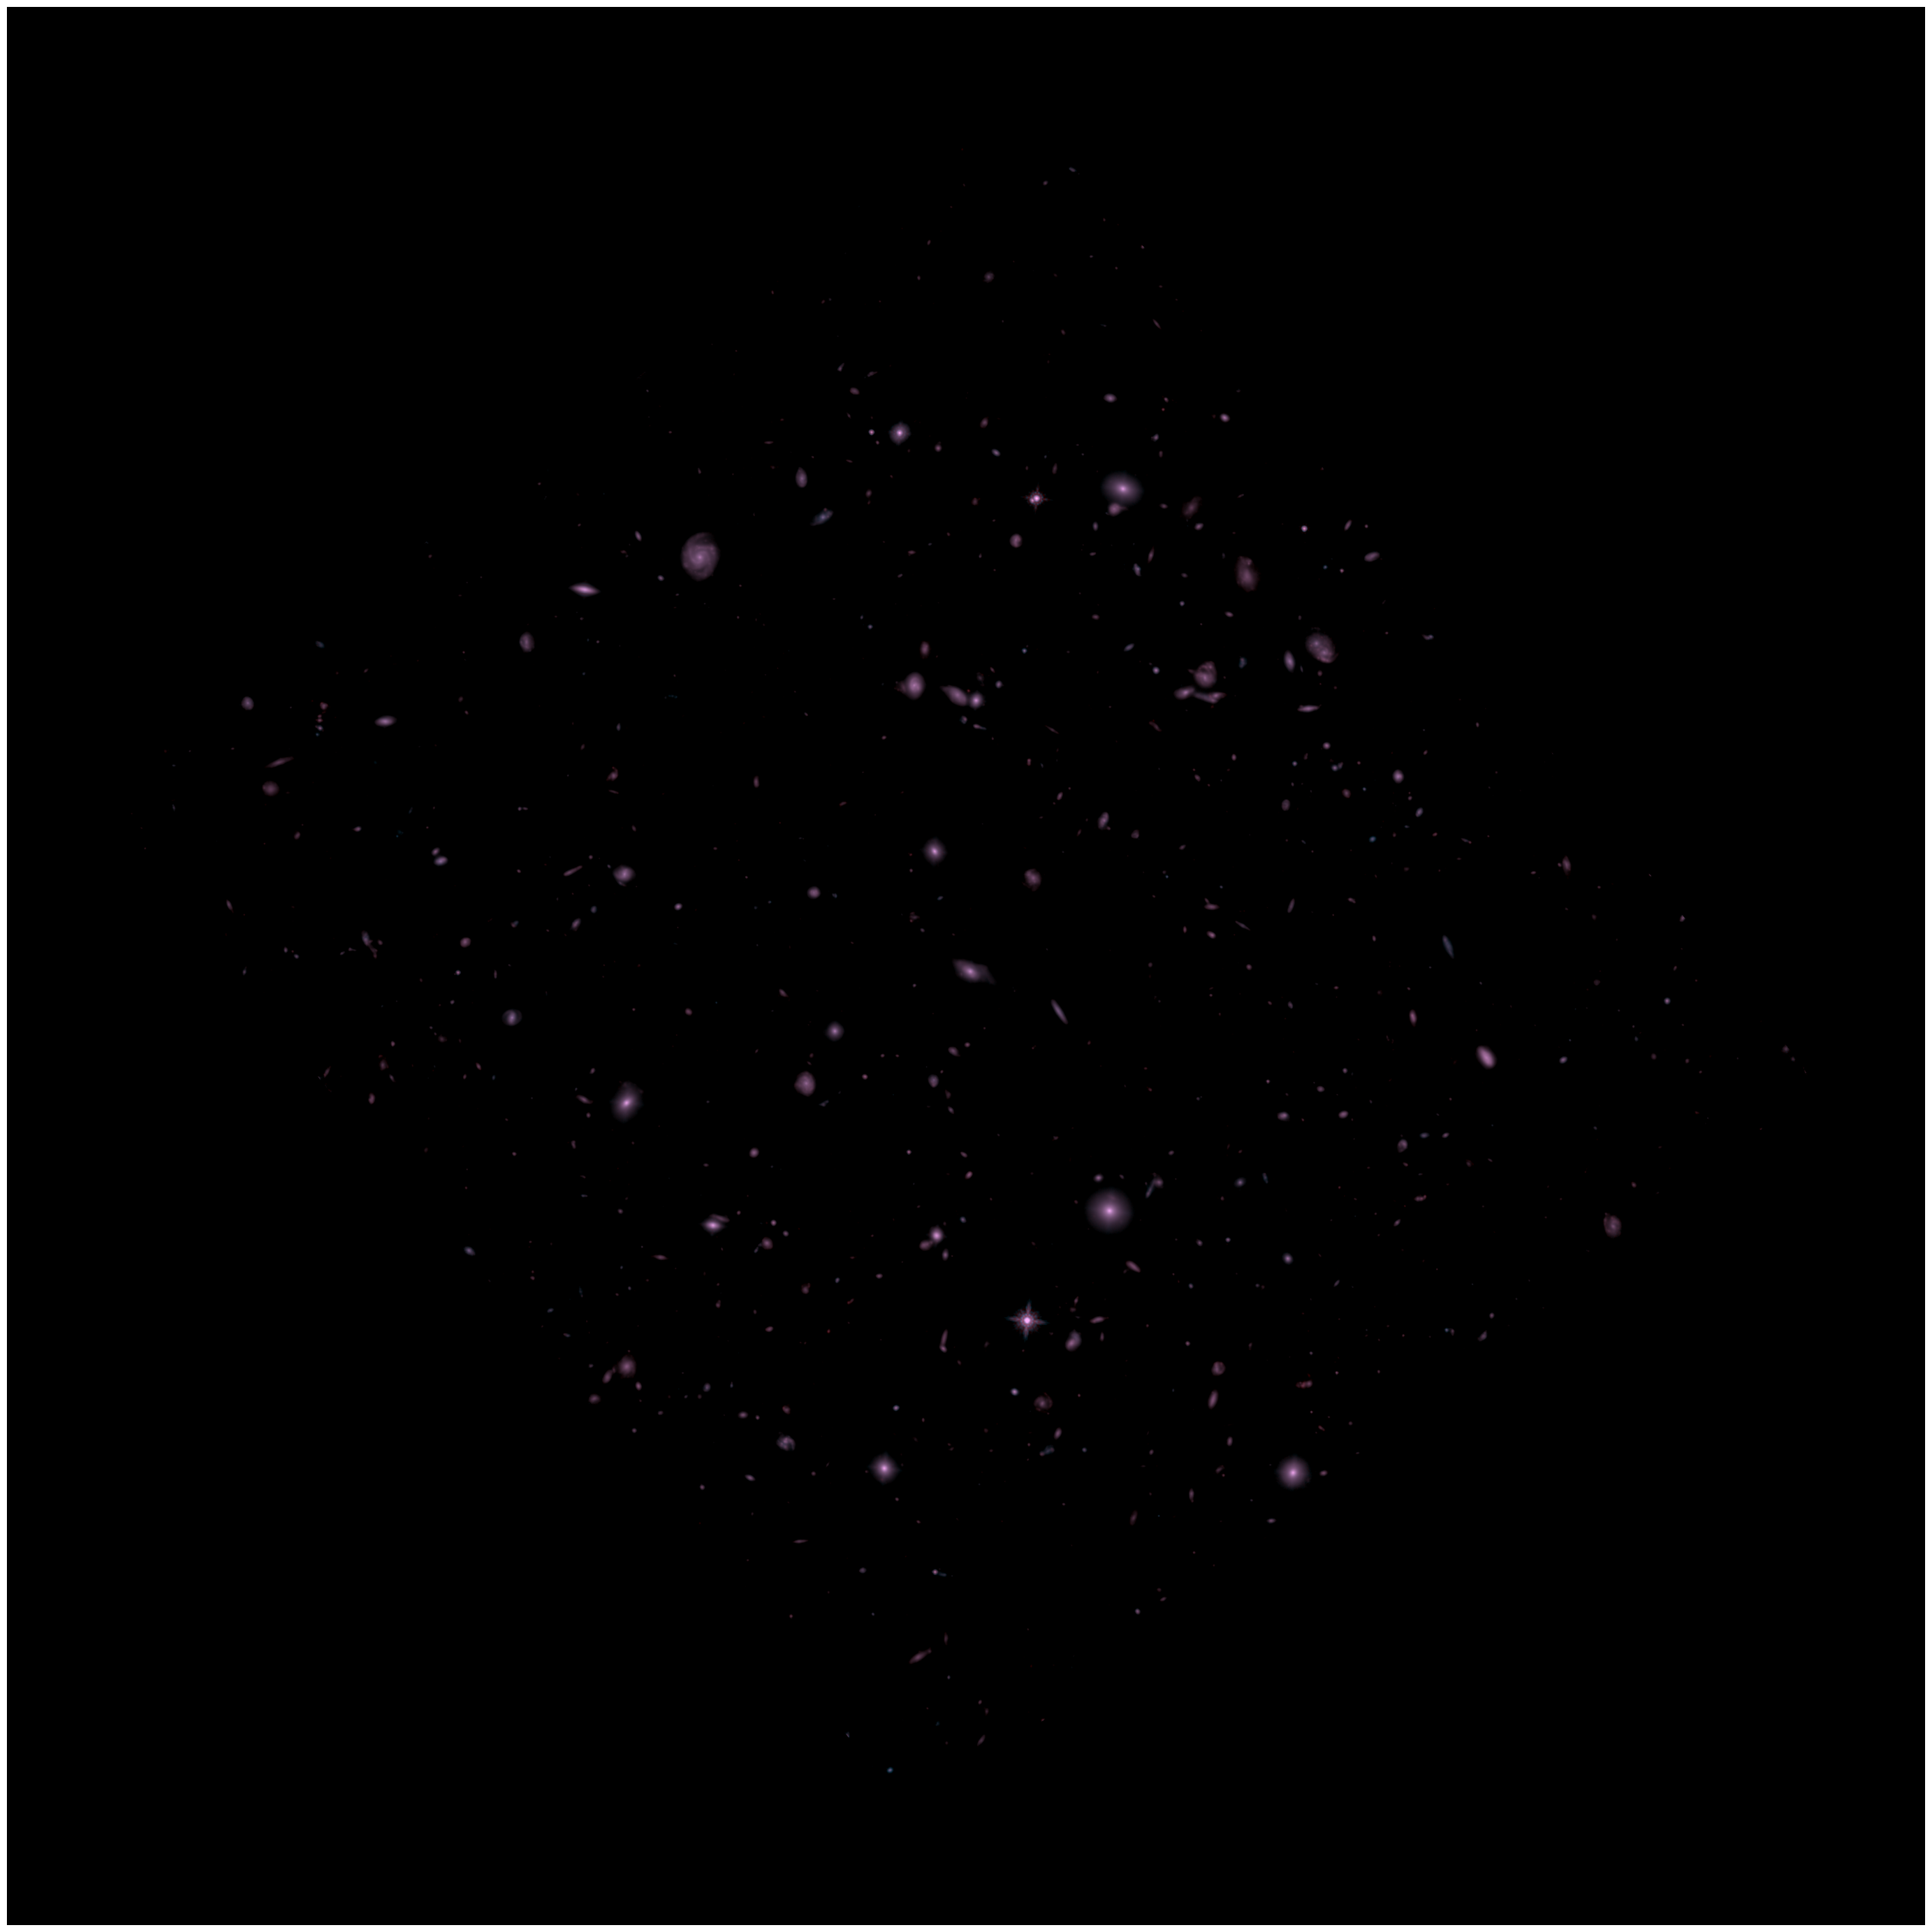

In [21]:
xsize = rgb.shape[1]
ysize = rgb.shape[0]

f,ax = plt.subplots(1,1,figsize=(xsize/100.,ysize/100.0))
ax.axis('off')
ax.imshow(rgb,origin='lower')